# Seoul Bike Trip Duration Prediction

<img src="Features_Description.png" style="float:right;" width="500"/>

### Context
- Trip duration is the most fundamental measure in all modes of transportation. 
- Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. 
- In order to predict the trip duration, data mining techniques are employed in this paper to predict the trip duration of rental bikes in Seoul Bike sharing system. 
- The prediction is carried out with the combination of Seoul Bike data and weather data.

### Content
- The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, 
temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.

### Acknowledgements
- V E, Sathishkumar (2020), "Seoul Bike Trip duration prediction", Mendeley Data, V1, doi: 10.17632/gtfh9z865f.1
- Sathishkumar V E, Jangwoo Park, Yongyun Cho, (2019), Seoul bike trip duration prediction using data mining techniques, IET Intelligent Transport Systems, doi: 10.1049/iet-its.2019.0796

### Goal
- Predict the trip duration

### Steps
- **Exploratory Data Analysis (EDA)**
- Data Preprocessing
- Feature Selection / Transformation
- Mahcine Learning Algorithm
- Feature Importance / Engineering
- Hyperparameter Tuning
- Model Deployment

## Load libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from helper_functions import *

## Data

In [23]:
loadPkl = 1 # 0 --> read csv, 1 --> load pkl

if loadPkl:
    # Use pickle to load the data -- faster than reading a csv
    dataset = joblib.load('data/dataset.pkl')
else:
    # 1.23 GB of data
    dataset = pd.read_csv('data/For_modeling.csv')

    # Drop unwanted columns
    dataset = dataset.drop(columns='Unnamed: 0')

    # Dump the dataset to load it later
    joblib.dump(dataset, 'data/dataset.pkl')


In [24]:
# Check for null values
dataset.isnull().sum().sum()

0

## EDA

### !!! Smaller dataset for now ```frac=0.1```. Later the notebook will be run on the entire data set by using ```frac=1.0```!!!

In [25]:
df = dataset.sample(frac=0.1)
# df = dataset.sample(frac=1.0)
df.sample(10).T

528012      6864338      9522981      7292917      2669303  \
Duration      73.000000    7.000000     7.000000    16.000000    18.000000   
Distance    5880.000000  740.000000  1520.000000  2480.000000  1560.000000   
PLong         37.520077   37.564541    37.577793    37.539654    37.548561   
PLatd        127.112366  126.927071   127.057831   127.052589   127.045006   
DLong         37.513126   37.557060    37.585197    37.532970    37.558052   
DLatd        127.100960  126.924423   127.060951   127.075935   127.040352   
Haversine      1.268619    0.863976     0.867983     2.188575     1.132294   
Pmonth         3.000000   10.000000    12.000000    10.000000     6.000000   
Pday          17.000000    1.000000    24.000000    10.000000     9.000000   
Phour         15.000000   19.000000    22.000000    21.000000    19.000000   
Pmin          35.000000   37.000000    27.000000    38.000000    40.000000   
PDweek         5.000000    0.000000     0.000000     2.000000     5.000000   
Dmonth         3.000000   10.000000    12.000000    10.000000     6.000000   
Dday          17.000000    1.000000    24.000000    10.000000     9.000000   
Dhour         16.000000   19.000000    22.000000    21.000000    19.000000   
Dmin          49.000000   44.000000    35.000000    56.000000    58.000000   
DDweek         5.000000    0.000000     0.000000     2.000000     5.000000   
Temp          13.200000   16.200000    -3.200000     9.900000    25.700000   
Precip         0.000000    0.000000     0.000000     0.000000     0.000000   
Wind           2.800000    2.200000     0.500000     1.200000     1.800000   
Humid         23.000000   62.000000    37.000000    50.000000    47.000000   
Solar          2.520000    0.000000     0.000000     0.000000     0.040000   
Snow           0.000000    0.000000     0.000000     0.000000     0.000000   
GroundTemp    20.400000   17.100000    -3.000000     8.500000    26.100000   
Dust          28.000000   10.000000    29.000000     9.000000    18.000000   

               190109       627086       5061645      4362951      2634659  
Duration      4.000000    10.000000    99.000000     9.000000    25.000000  
Distance    630.000000  1720.000000  1970.000000  2590.000000  4060.000000  
PLong        37.532848    37.585590    37.557499    37.568550    37.577202  
PLatd       127.121048   126.884727   126.923805   126.914513   126.902351  
DLong        37.529251    37.577995    37.564697    37.578381    37.610004  
DLatd       127.123108   126.891472   126.912613   126.936096   126.916397  
Haversine     0.439286     1.032716     1.270364     2.193861     3.851647  
Pmonth        2.000000     3.000000     8.000000     7.000000     6.000000  
Pday          8.000000    25.000000    18.000000    28.000000     8.000000  
Phour        12.000000     3.000000    23.000000    12.000000    21.000000  
Pmin         58.000000    18.000000    42.000000    25.000000    41.000000  
PDweek        3.000000     6.000000     5.000000     5.000000     4.000000  
Dmonth        2.000000     3.000000     8.000000     7.000000     6.000000  
Dday          8.000000    25.000000    19.000000    28.000000     8.000000  
Dhour        13.000000     3.000000     1.000000    12.000000    22.000000  
Dmin          3.000000    29.000000    22.000000    36.000000     7.000000  
DDweek        3.000000     6.000000     6.000000     5.000000     4.000000  
Temp         -1.500000     5.500000    25.900000    33.600000    21.200000  
Precip        0.000000     0.000000     0.000000     0.000000     0.000000  
Wind          1.200000     0.900000     1.300000     1.900000     1.700000  
Humid        35.000000    83.000000    52.000000    62.000000    77.000000  
Solar         1.900000     0.000000     0.000000     1.350000     0.000000  
Snow          0.000000     0.000000     0.000000     0.000000     0.000000  
GroundTemp    0.800000     5.100000    24.900000    42.900000    20.500000  
Dust         74.000000     0.000000    19.000000    30.000000 

### Adding catagorical columns for EDA

- Since the data is huge, we make new features (preferably catagorical) for the purpose of EDA
- These new features may also be used later for modeling

In [26]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

**_duration_range_**

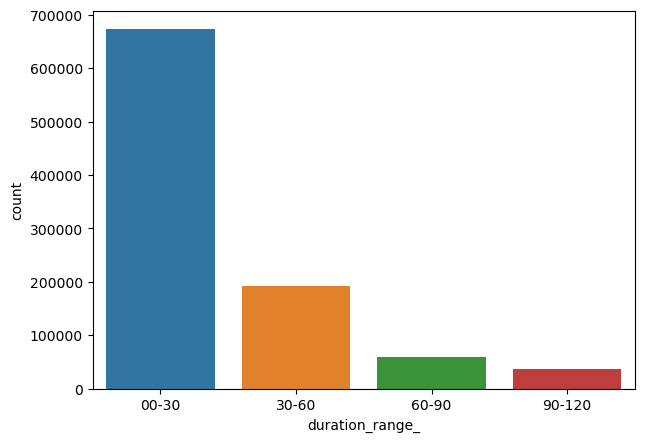

In [27]:
duration_order = ['00-30', '30-60', '60-90', '90-120']
def duration_range(duration):
    if duration>=0 and duration<=30:
        return duration_order[0]
    elif duration>30 and duration<60:
        return duration_order[1]
    elif duration>=60 and duration<=90:
        return duration_order[2]
    else:
        return duration_order[3]

df['duration_range_'] = df['Duration'].apply(duration_range)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5), dpi=100)
sns.countplot(data=df, x='duration_range_', order=duration_order, ax=ax);

- Clearly, most of the bike trips are short and under 30 mins.

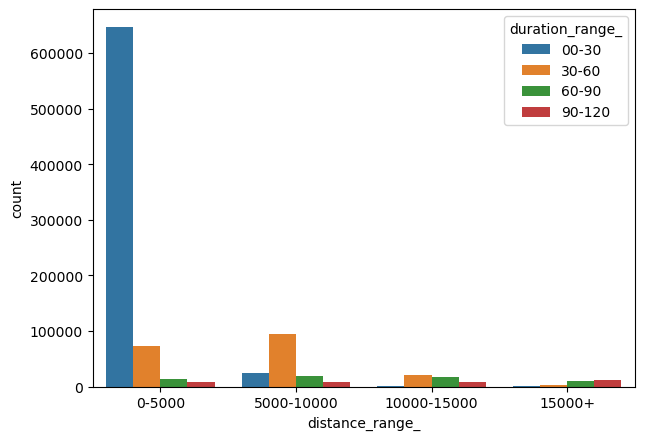

In [28]:
distance_order = ['0-5000', '5000-10000', '10000-15000', '15000+']
distance_order_str = str(distance_order).strip('[').strip(']').split()
def distance_range(distance):
    if distance>=0 and distance<=5000:
        return distance_order[0]
    elif distance>5000 and distance<10000:
        return distance_order[1]
    elif distance>=10000 and distance<=15000:
        return distance_order[2]
    else:
        return distance_order[3]

df['distance_range_'] = df['Distance'].apply(distance_range)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5), dpi=100)
sns.countplot(data=df, x='distance_range_', order=distance_order, hue='duration_range_', hue_order=duration_order, ax=ax);

- For a distance range of upto 5000, most of the trip is under 30 mins.
- While for the distance range of 5000-10000, majorty of the trips is between 30-60 mins.  

**_time_of_day_**

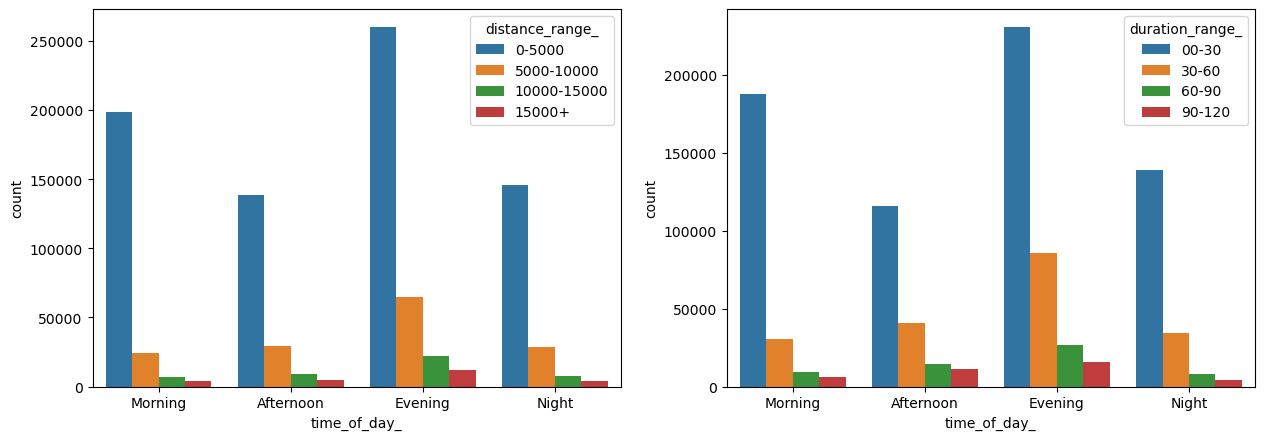

In [29]:
day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
def time_of_day(hr):
    if hr>=5 and hr<=12:
        return 'Morning'
    elif hr>12 and hr<17:
        return 'Afternoon'
    elif hr>=17 and hr<=21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day_'] = df['Phour'].apply(time_of_day)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=100)
sns.countplot(data=df, x='time_of_day_', order=day_order, hue='distance_range_', hue_order=distance_order, ax=ax[0]);
sns.countplot(data=df, x='time_of_day_', order=day_order, hue='duration_range_', hue_order=duration_order, ax=ax[1]);

- A large numner of bike trips is recorded in mornings and evenings.

**_long_diff, latd_diff_**

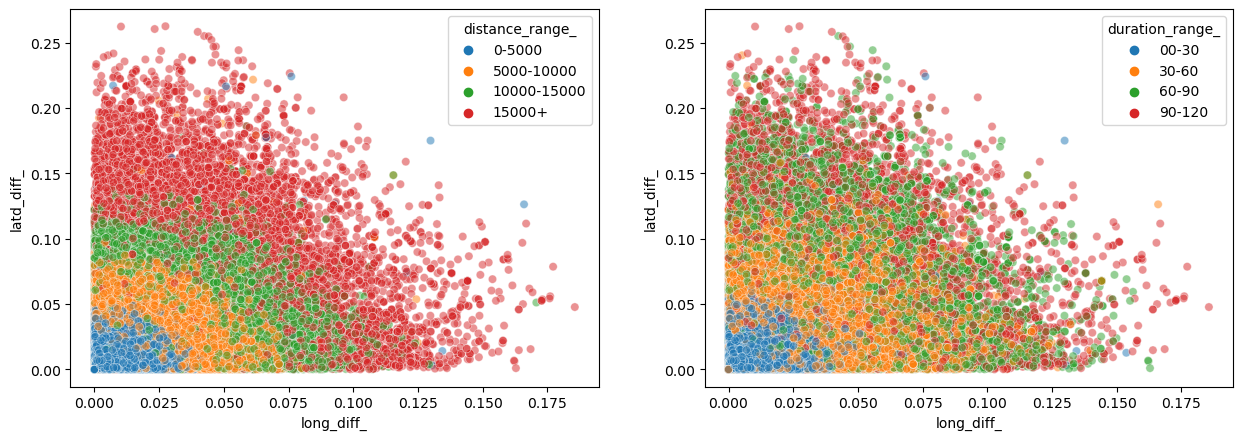

In [30]:
df['long_diff_'] = abs(df['PLong'] - df['DLong'])
df['latd_diff_'] = abs(df['PLatd'] - df['DLatd'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=100)
sns.scatterplot(data=df, x='long_diff_', y='latd_diff_', hue='distance_range_', hue_order=distance_order, alpha=0.5, ax=ax[0]);
sns.scatterplot(data=df, x='long_diff_', y='latd_diff_', hue='duration_range_', hue_order=duration_order, alpha=0.5, ax=ax[1]);

- There is clear corelation between distance and absolute difference of Pickip and Dropoff latitude (and longitude) difference.
- The duration, although shows some correlation, has not so clear clusters boundries.

**_geographical_PCs_**

We use PCA to convert the geographical features -

['Distance', 'Haversine', 'PLong', 'DLong', 'PLatd', 'DLatd']

into a few principal components.

geographical_explained_variance_ratio = 0.8393318647288169


/home/p285464/.conda/envs/torchEnv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


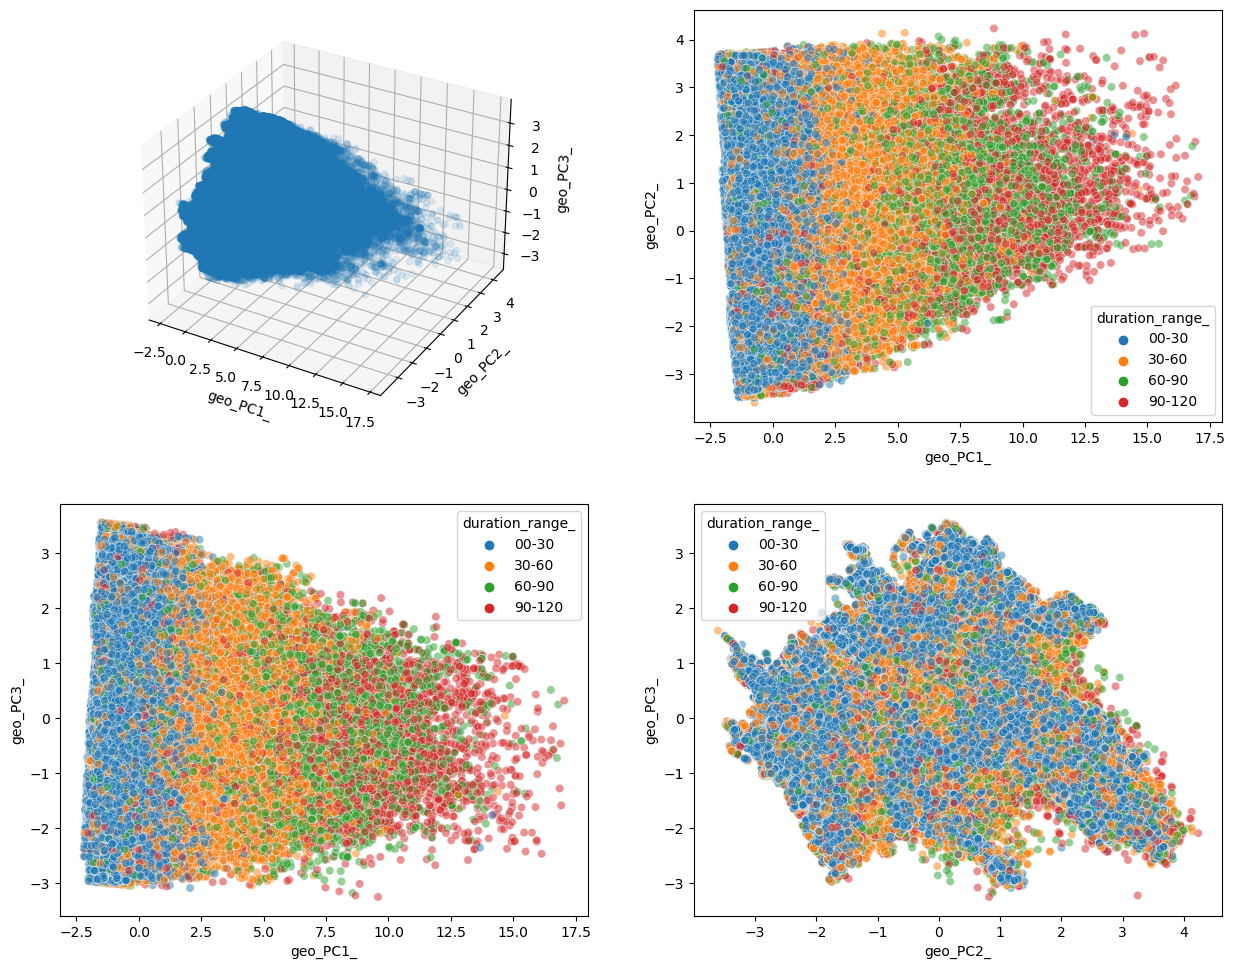

In [31]:
num_geographical_PCs = 3
geographical_cols = ['Distance', 'Haversine', 'PLong', 'DLong', 'PLatd', 'DLatd', 'long_diff_', 'latd_diff_']

geographical_PCs, geographical_explained_variance_ratio = pca_pipe(df[geographical_cols], n=num_geographical_PCs)
print(f"geographical_explained_variance_ratio = {geographical_explained_variance_ratio.sum()}")

geo_PC_cols = ['geo_PC1_', 'geo_PC2_', 'geo_PC3_']
df[geo_PC_cols] = geographical_PCs

fig = plt.figure(figsize=(15,12), dpi=100)

ax1 = fig.add_subplot(221, projection = '3d')
ax1.scatter(df.geo_PC1_, df.geo_PC2_, df.geo_PC3_, alpha=0.1);
ax1.set_xlabel(geo_PC_cols[0]); ax1.set_ylabel(geo_PC_cols[1]); ax1.set_zlabel(geo_PC_cols[2]);

ax2 = fig.add_subplot(222)
sns.scatterplot(data=df, x='geo_PC1_', y='geo_PC2_', hue='duration_range_', hue_order=duration_order, alpha=0.5, ax=ax2);

ax3 = fig.add_subplot(223)
sns.scatterplot(data=df, x='geo_PC1_', y='geo_PC3_', hue='duration_range_', hue_order=duration_order, alpha=0.5, ax=ax3);

ax4 = fig.add_subplot(224)
sns.scatterplot(data=df, x='geo_PC2_', y='geo_PC3_', hue='duration_range_', hue_order=duration_order, alpha=0.5, ax=ax4);

- All three geographical principal components have strong correlation with duration.

**_weather_PCA_**

We use PCA to convert the weather related features -

['Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'] 

into a few principal components.

weather_explained_variance_ratio = 0.6396985123246984


/home/p285464/.conda/envs/torchEnv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


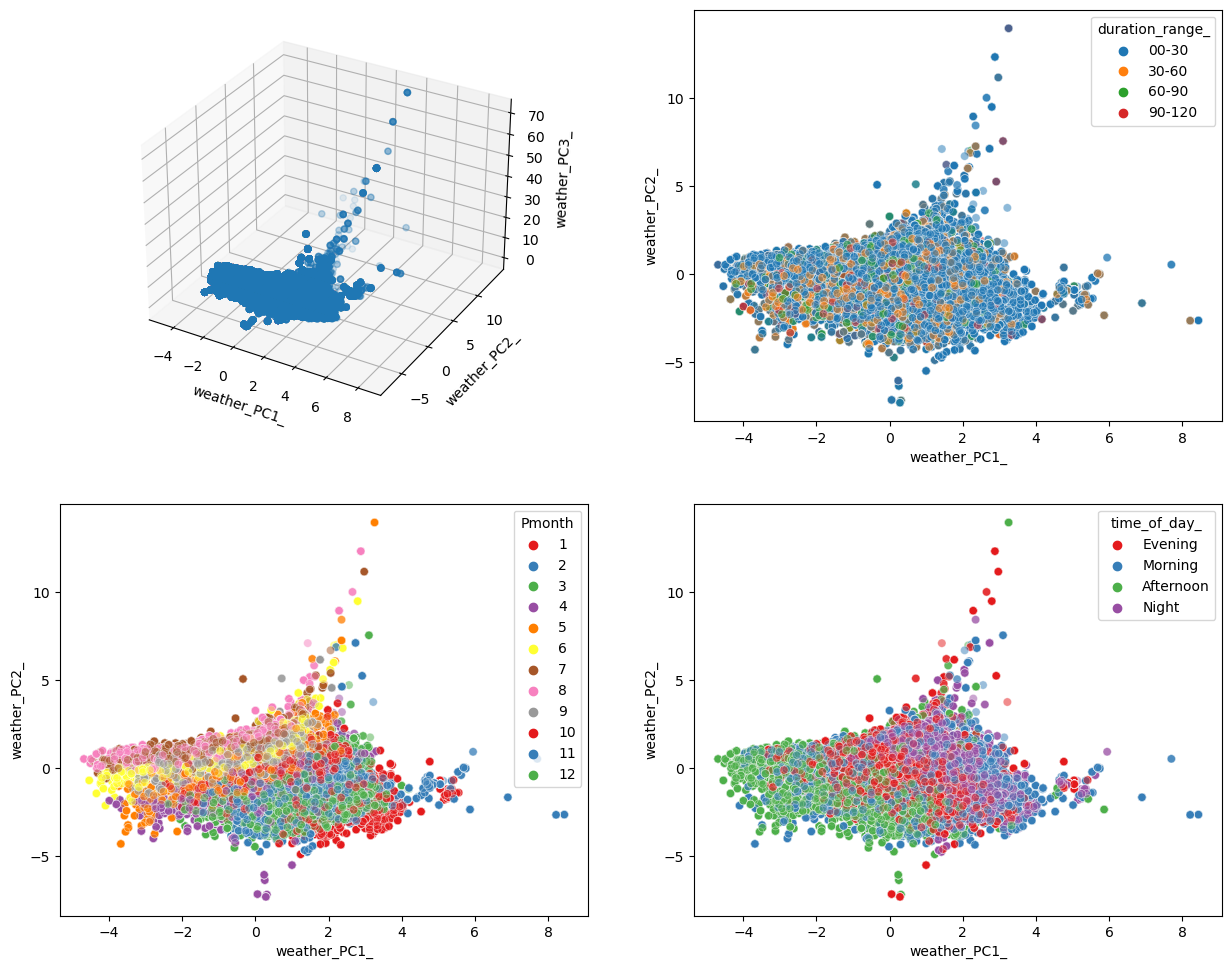

In [32]:
num_weather_PCs = 3
weather_cols = ['Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']

weather_PCs, weather_explained_variance_ratio = pca_pipe(df[weather_cols], n=num_weather_PCs)
print(f"weather_explained_variance_ratio = {weather_explained_variance_ratio.sum()}")

weather_PC_cols = ['weather_PC1_', 'weather_PC2_', 'weather_PC3_']
df[weather_PC_cols] = weather_PCs

fig = plt.figure(figsize=(15,12), dpi=100)

ax1 = fig.add_subplot(221, projection = '3d')
ax1.scatter(df.weather_PC1_, df.weather_PC2_, df.weather_PC3_, alpha=0.1);
ax1.set_xlabel(weather_PC_cols[0]); ax1.set_ylabel(weather_PC_cols[1]); ax1.set_zlabel(weather_PC_cols[2]);

ax2 = fig.add_subplot(222)
sns.scatterplot(data=df, x='weather_PC1_', y='weather_PC2_', hue='duration_range_', hue_order=duration_order, alpha=0.5, ax=ax2);

ax3 = fig.add_subplot(223)
sns.scatterplot(data=df, x='weather_PC1_', y='weather_PC2_', hue='Pmonth', palette='Set1', alpha=0.5, ax=ax3);

ax4 = fig.add_subplot(224)
sns.scatterplot(data=df, x='weather_PC1_', y='weather_PC2_', hue='time_of_day_', palette='Set1', alpha=0.5, ax=ax4);

- Clearly, the 3rd weather PC has a lot of outliers (variance placeholder) and can be skipped.
- The 1st and 2nd weather PCs have strong correlation with time of the day and month of the year.

### Check statistics

In [33]:
df.describe().T

count          mean          std         min          25%  \
Duration      960114.0  2.580537e+01    25.043473    1.000000     8.000000   
Distance      960114.0  3.712877e+03  3955.870102    1.000000  1230.000000   
PLong         960114.0  3.754757e+01     0.044389   37.437271    37.514240   
PLatd         960114.0  1.269907e+02     0.082604  126.798599   126.919991   
DLong         960114.0  3.754762e+01     0.044402   37.437271    37.514240   
DLatd         960114.0  1.269907e+02     0.083270  126.798599   126.919395   
Haversine     960114.0  1.868393e+00     1.994682    0.000000     0.672904   
Pmonth        960114.0  7.573048e+00     2.698305    1.000000     6.000000   
Pday          960114.0  1.578147e+01     8.749932    1.000000     8.000000   
Phour         960114.0  1.438177e+01     6.248782    0.000000    10.000000   
Pmin          960114.0  2.914661e+01    17.263390    0.000000    14.000000   
PDweek        960114.0  2.942396e+00     1.976693    0.000000     1.000000   
Dmonth        960114.0  7.573470e+00     2.698286    1.000000     6.000000   
Dday          960114.0  1.578074e+01     8.749803    1.000000     8.000000   
Dhour         960114.0  1.443181e+01     6.483443    0.000000    10.000000   
Dmin          960114.0  2.999329e+01    17.308809    0.000000    15.000000   
DDweek        960114.0  2.945010e+00     1.978091    0.000000     1.000000   
Temp          960114.0  1.856483e+01     9.506931  -17.800000    12.200000   
Precip        960114.0  1.765874e-02     0.372088    0.000000     0.000000   
Wind          960114.0  1.820778e+00     0.971969    0.000000     1.100000   
Humid         960114.0  5.395079e+01    17.423042   10.000000    41.000000   
Solar         960114.0  7.293734e-01     0.916996    0.000000     0.000000   
Snow          960114.0  9.992147e-03     0.163263    0.000000     0.000000   
GroundTemp    960114.0  2.072623e+01    12.657654  -13.600000    11.600000   
Dust          960114.0  3.248877e+01    24.094141    0.000000    16.000000   
long_diff_    960114.0  1.049220e-02     0.012917    0.000000     0.002438   
latd_diff_    960114.0  1.371879e-02     0.018225    0.000000     0.003112   
geo_PC1_      960114.0 -1.229241e-17     1.679341   -2.203057    -1.033575   
geo_PC2_      960114.0 -2.488084e-17     1.484795   -3.606244    -1.268377   
geo_PC3_      960114.0  1.896776e-17     1.299946   -3.252619    -0.884486   
weather_PC1_  960114.0 -3.368757e-17     1.558639   -4.691361    -0.998550   
weather_PC2_  960114.0 -2.024806e-17     1.295004   -7.330036    -0.891168   
weather_PC3_  960114.0  2.870696e-17     1.005586   -0.618906    -0.226158   

                      50%          75%           max  
Duration        16.000000    36.000000    119.000000  
Distance      2280.000000  4620.000000  33290.000000  
PLong           37.546848    37.573242     37.689720  
PLatd          126.994263   127.061768    127.180267  
DLong           37.546547    37.573242     37.689720  
DLatd          126.994263   127.062424    127.180267  
Haversine        1.257316     2.363264     23.341572  
Pmonth           8.000000    10.000000     12.000000  
Pday            16.000000    23.000000     31.000000  
Phour           16.000000    19.000000     23.000000  
Pmin            29.000000    44.000000     59.000000  
PDweek           3.000000     5.000000      6.000000  
Dmonth           8.000000    10.000000     12.000000  
Dday            16.000000    23.000000     31.000000  
Dhour           16.000000    20.000000     23.000000  
Dmin            30.000000    45.000000     59.000000  
DDweek           3.000000     5.000000      6.000000  
Temp            20.100000    25.500000     39.400000  
Precip           0.000000     0.000000     35.000000  
Wind             1.700000     2.400000      7.400000  
Humid           53.000000    67.000000     98.000000  
Solar            0.270000     1.260000      3.520000  
Snow             0.000000     0.000000      8.800000  
GroundTemp      21.100000    28.600000     6

In [34]:
cat_cols = ['Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', \
            'Dmin', 'DDweek', 'time_of_day_', 'distance_range_', 'duration_range_']

### Correlation

In [35]:
df_corr = df.drop(columns=cat_cols).corr()

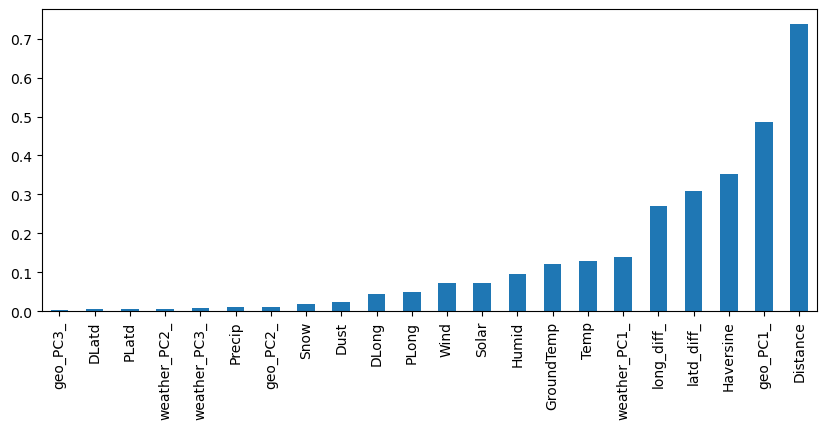

In [36]:
plt.figure(figsize=(10,4), dpi=100)
df_corr['Duration'].abs().sort_values()[:-1].plot(kind='bar');

- Distance and Haversine are highly corelated with Duration
- Amongst the PCs of only the 1st geographical and weather PCs are strongly correlated to the duration (may be useful for modelling later on).

### Distribution of all features

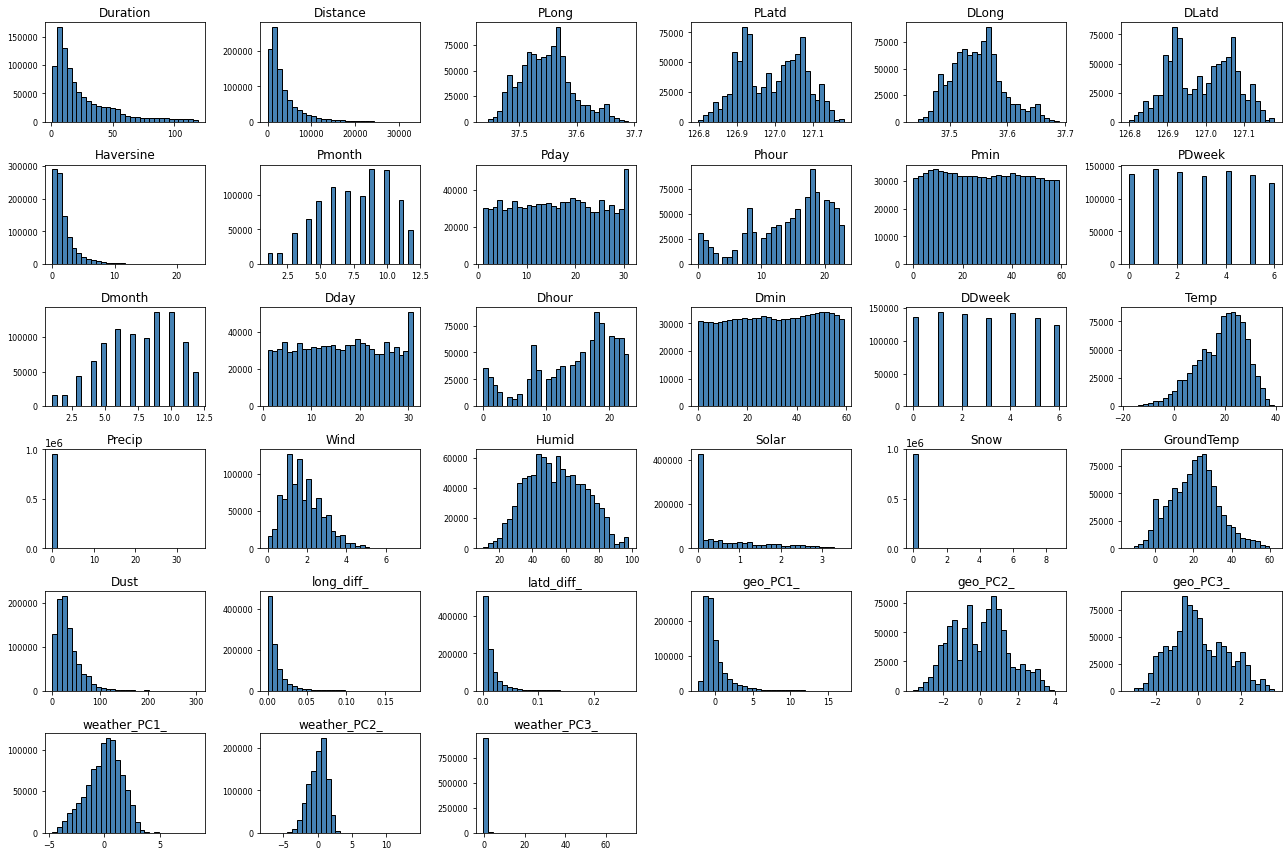

In [37]:
df.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
        xlabelsize=8, ylabelsize=8, grid=False); 
plt.tight_layout(rect=(0, 0, 3, 3))

- Most of the trips are snow and radiation free.
- The distributions of Duration, distance and Haversine are similar.
- Overall, a lower wind speed, arounf 50% humidity, around 25 deg temperaure and a low dust concentration is preferred for the trips.

### Scatter plots

/home/p285464/.conda/envs/torchEnv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


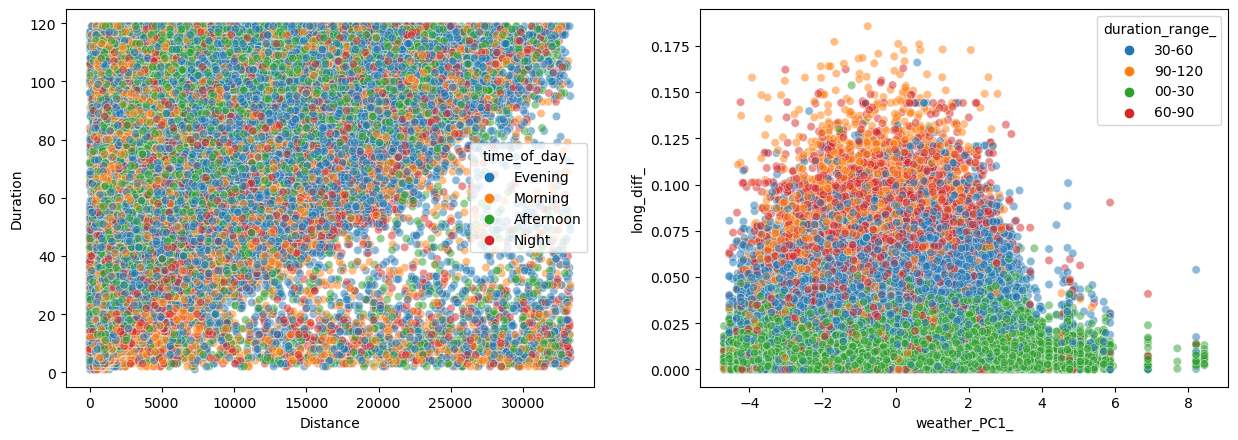

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5), dpi=100)

sns.scatterplot(data=df, x='Distance', y='Duration', hue='time_of_day_', alpha=0.5, ax=ax[0]);
sns.scatterplot(data=df, x='weather_PC1_', y='long_diff_', hue='duration_range_', alpha=0.5, ax=ax[1]);

- For small distances, the duration is small but with large variance, implying other features also contribute to the duration.
- Clusters of range of durations is realized against longitude difference and weather PC1. Large longitude difference and extreme weather conditions are avoided by cyclists.  

### Count plots

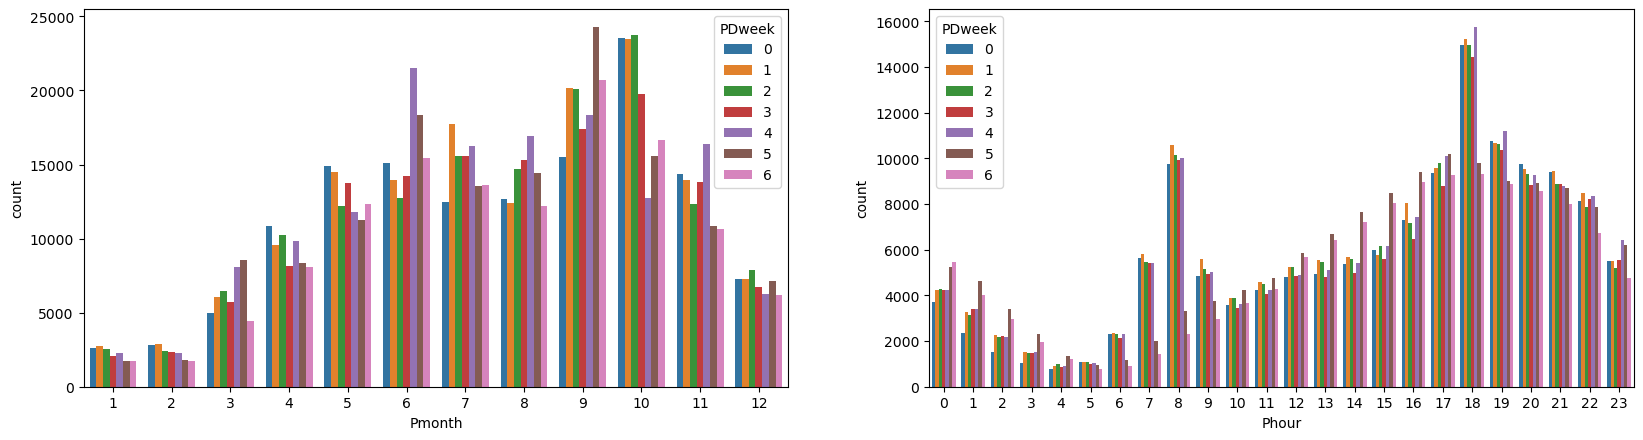

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,5), dpi=100)

sns.countplot(data=df, x='Pmonth', hue='PDweek', ax=ax[0]);
sns.countplot(data=df, x='Phour', hue='PDweek', ax=ax[1]);

- Most of the trips are in the months of September and October i.e. in autumn.
- While, fewer bike trips are realized between December to March i.e. in winter.
- Peak timimngs for the bike trips is in the mornings (7-9 am) and in the evenings (5-7 pm).
- On average, the most busy are the weekdays. However, there are some rush on weekends in summer! 

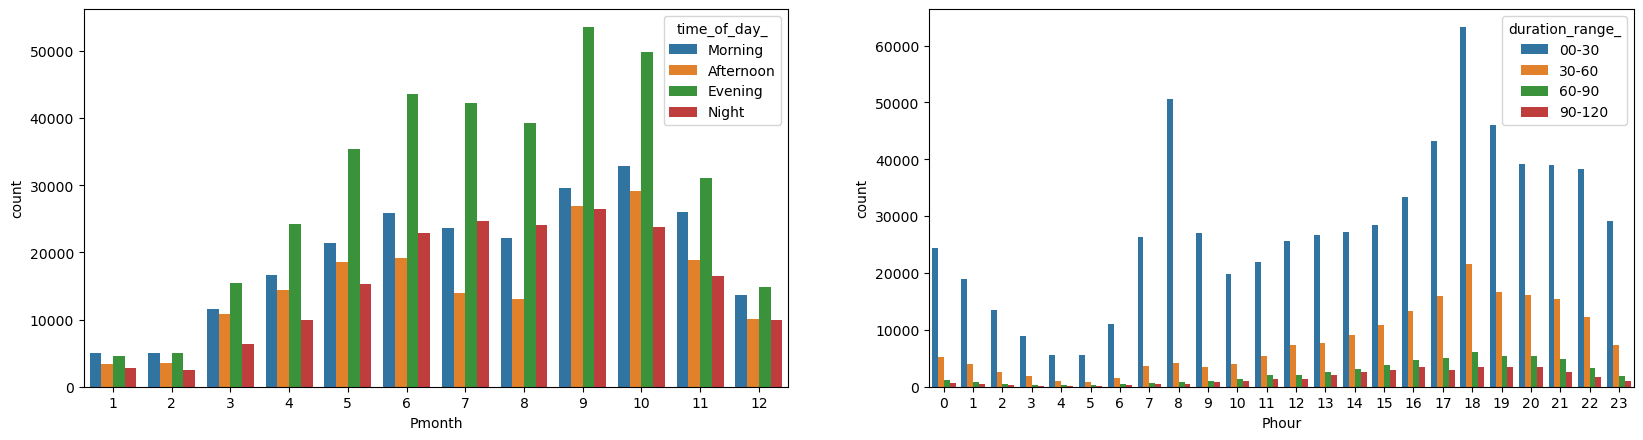

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,5), dpi=100)

sns.countplot(data=df, x='Pmonth', hue='time_of_day_', hue_order=day_order, ax=ax[0]);
sns.countplot(data=df, x='Phour', hue='duration_range_', hue_order=duration_order, ax=ax[1]);

- Clearly, the evenings are the busiest, followed by the mornings.
- Most of the trips are upto 30 mins long, followed by 30-60 mins trips. 

### Box and Bar plots

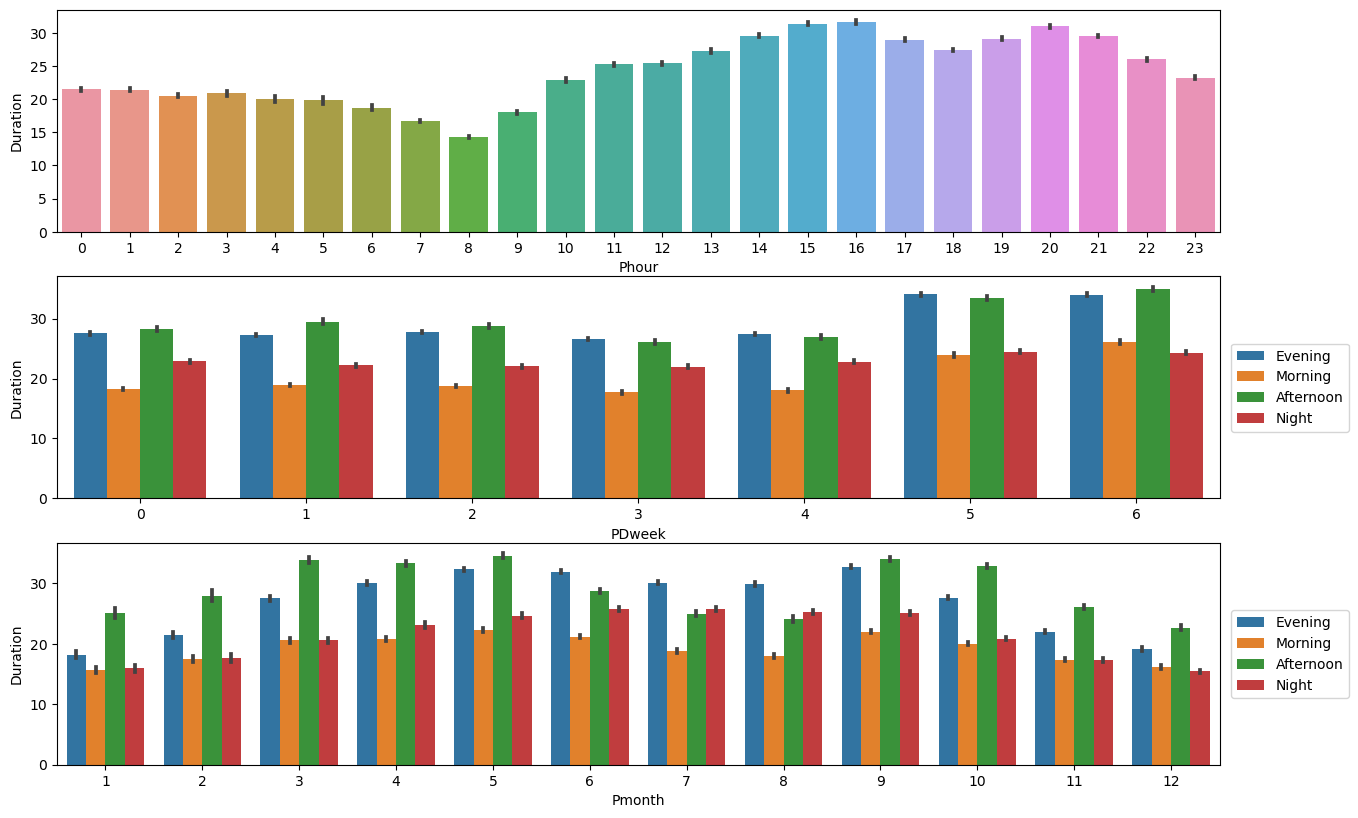

In [41]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15,10), dpi=100)

sns.barplot(data=df, x='Phour', y='Duration', ax=ax[0]);
sns.barplot(data=df, x='PDweek', y='Duration', ax=ax[1], hue='time_of_day_');
ax[1].legend(loc=(1.01,0.3));
sns.barplot(data=df, x='Pmonth', y='Duration', ax=ax[2], hue='time_of_day_');
ax[2].legend(loc=(1.01,0.3));

- Although one of the peaks of is 8am, the mean duration is actually minimum at 8am. This can be attributed to the morning rush.
- Note that the mean duartion on Fri and Sat is the highest. Guess a lot people are enjoying weekend bike trips.
- In winters most of the trips are in afternoon (enjoying sun), while in summer most of the trips are in the evening (avoiding sun).

### (Customary) Pairplot

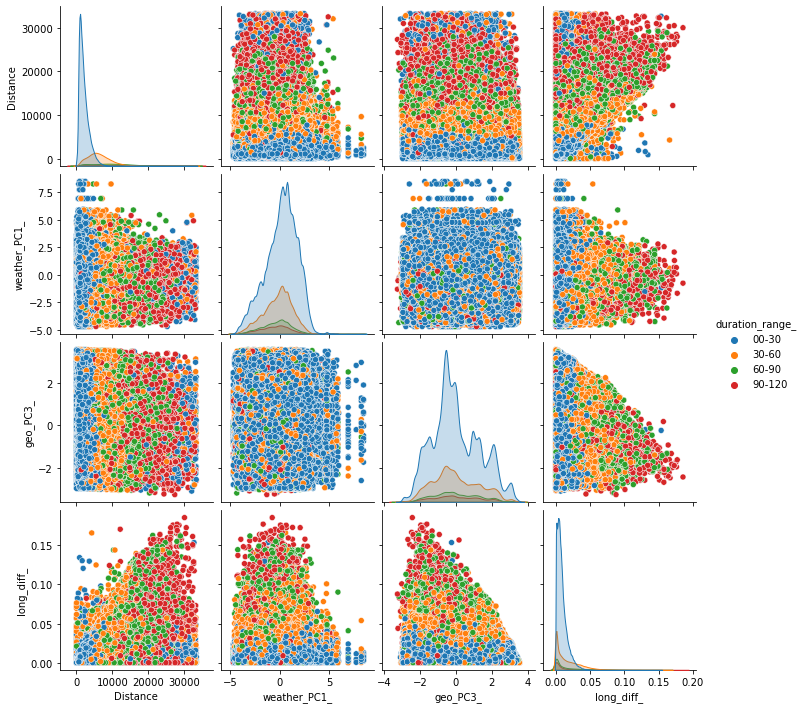

In [42]:
cols = ['Distance', 'weather_PC1_', 'geo_PC3_', 'long_diff_','duration_range_']
sns.pairplot(df[cols], hue='duration_range_', hue_order=duration_order, diag_kind='kde', corner=False);

- The kde plots for Distance and longitude difference are highly skewed for the duration of 0-30 mins range.
- Clusters are evident for different duration ranges in almost all the scatter plots.

## Save EDAed data

In [43]:
# Dump the dataset to load it later
joblib.dump(df, 'data/dataset_EDAed.pkl')

['data/dataset_EDAed.pkl']